In [ ]:
library(ggplot2)

In [2]:
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
sce_filename = paste0(mydir,"naive_Bcell_sce.RDS")

In [3]:
# 57,641 features 
# across 71,274 samples (naive B cells only)
# with two assays: SCT and RNA
# dimensionality reductions: PCA, UMAP
sce = readRDS(sce_filename)
sce

Loading required package: SeuratObject

Loading required package: Seurat



An object of class Seurat 
57641 features across 71374 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [4]:
# select chr22 genes only

In [5]:
## gene location file
genes_filename =  paste0(mydir,"GeneLocations.tsv")
genes_df = read.csv(genes_filename, sep="\t")
chr22_genes = unique(genes_df[genes_df$seqid == '22',"gene_name"])

In [207]:
length(chr22_genes)

[1] 703

In [6]:
sce_22 = subset(sce, features = chr22_genes[chr22_genes %in% rownames(sce)])

In [322]:
df = sce_22[["SCT"]]@meta.features
head(df[order(df$sct.gmean, decreasing=TRUE),], 200)

,sct.detection_rate,sct.gmean,sct.variance,sct.residual_variance,sct.variable
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
RPL3,0.9976401,16.5749388,234.3540763,1.0924628,FALSE
EIF3L,0.5624072,0.7347408,1.8036680,0.8995602,FALSE
RAC2,0.5583349,0.7296531,1.9261384,1.1933105,TRUE
LGALS1,0.3585131,0.5695497,12.1833307,7.6148885,TRUE
SMDT1,0.4898423,0.5686253,1.1913685,1.0013435,FALSE
MIF,0.5015588,0.5656225,1.3212327,1.0059635,FALSE
ST13,0.4367826,0.4673363,0.8968975,0.9635100,FALSE
TSPO,0.4118480,0.4554051,1.7117276,1.6258788,TRUE
EIF3D,0.4215659,0.4432319,0.8535576,0.9096995,FALSE


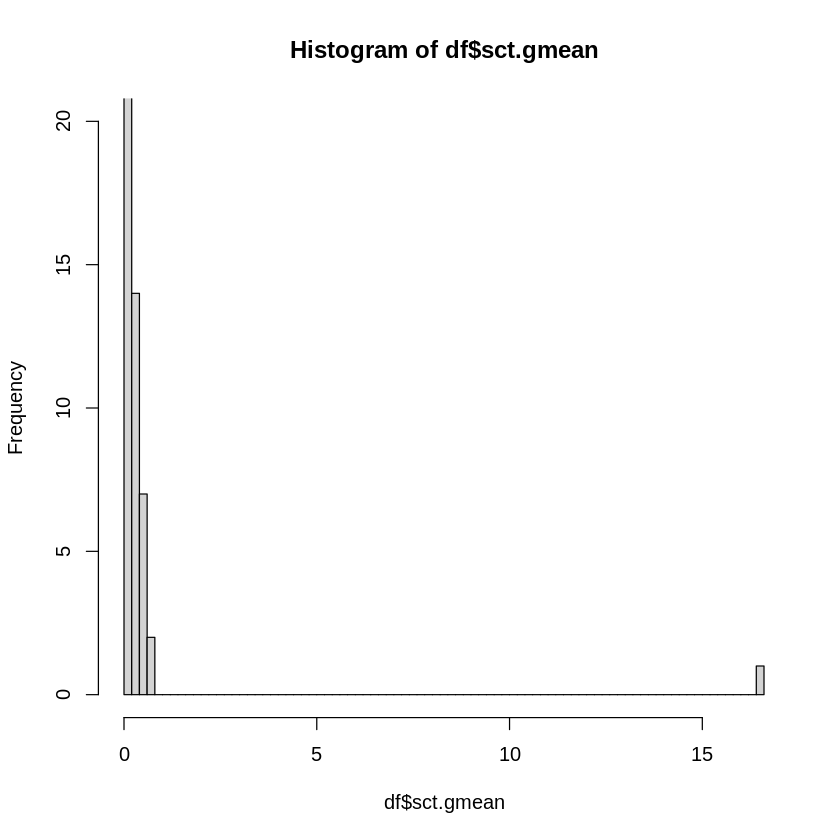

In [223]:
hist(df$sct.gmean, breaks = 100, ylim = c(0,20))

In [211]:
nrow(df[order(df$sct.gmean, decreasing=TRUE),])

[1] 600

In [212]:
x=0
discarded_genes = c()
for (gene in rownames(df)){
    y = FetchData(sce_22, vars = gene)
    if ((length(unique(y[,1])) == 1 && unique(y[,1]) == 0) == TRUE){
        x=x+1
        discarded_genes = c(discarded_genes, gene)
    }
}
x

[1] 54

In [323]:
# i = 150
# gene = chr22_genes[i]
# gene = "RPL3"
gene = "TAB1"
y = FetchData(sce_22, vars = gene)

In [324]:
(length(unique(y[,1])) == 1 && unique(y[,1]) == 0)

[1] FALSE

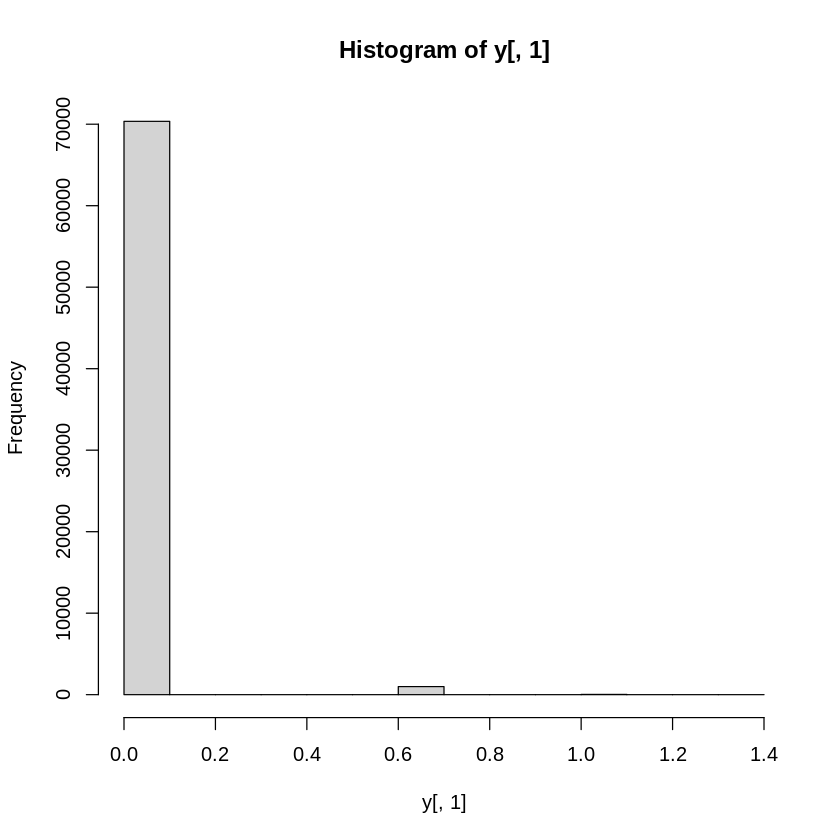

In [325]:
hist(y[,1])

In [326]:
#### Outliers using IQR 
# as in SCOUT (cancer)
# Outliers are detected according to cutoffs established by:
# (i) determining the first and third quartiles of the sample;
# (ii) calculating the interquartile range (IQR);
# (iii) multiplying the IQR by a Tukey Factor (TF);
# (iv) summing the value obtained in the previous step to thethird quartile.
# The result is the cutoff for outliers at the top of the population distribution. Alternatively, one may subtract 
# the value obtained in iii) from the first quartile, to obtain the cutoff for bottom outliers. 
# The stringency of the detection depends on the TF value; TF=1.5 detects possible outliers, TF=3 detects probable outliers

In [327]:
# quantile function defaults to quartiles (?)
qts = quantile(y[,1])
qts

0%      25%      50%      75%     100% 
0.000000 0.000000 0.000000 0.000000 1.386294

In [328]:
IQR = qts[4]-qts[2]
TF = 1.5
IQR*TF

75% 
  0

In [329]:
top_cutoff = qts[4] + IQR*TF
bottom_cutoff = qts[2] - IQR*TF
top_cutoff
bottom_cutoff

75% 
  0

25% 
  0

In [330]:
y$top = y[,1] > top_cutoff
y$bottom = y[,1] < bottom_cutoff
bottom_cells = rownames(y[y$bottom == TRUE,])
top_cells = rownames(y[y$top == TRUE,])

In [331]:
length(top_cells)
length(bottom_cells)

[1] 1023

[1] 0

In [332]:
# FeaturePlot(sce_22, features = gene)

In [333]:
# FeaturePlot(subset(sce_22, cells = top_cells), features = gene)

In [334]:
# FeaturePlot(subset(sce_22, cells = bottom_cells), features = gene)

In [335]:
#### Outliers using Z scores
# as in Bonder et al (bulk)
# Gene expression outliers for a given gene were defined as samples with a minimum gene expression z-score 
# (z-score < −2; underexpression outlier) or a maximum gene expression z-score (z-score > 2; overexpression outlier). 

In [336]:
v = y[,1]
y$z_scores <- (v-mean(v))/sd(v)
head(y)

,TAB1,top,bottom,z_scores
,<dbl>,<lgl>,<lgl>,<dbl>
AAACCTGCAACGATCT-1,0,FALSE,FALSE,-0.1199263
AAACGGGCAGTTCATG-1,0,FALSE,FALSE,-0.1199263
AAACGGGGTCCCTACT-1,0,FALSE,FALSE,-0.1199263
AAACGGGGTTGCGCAC-1,0,FALSE,FALSE,-0.1199263
AAAGATGGTTATGCGT-1,0,FALSE,FALSE,-0.1199263
AAAGATGTCATGCATG-1,0,FALSE,FALSE,-0.1199263


In [337]:
mean(z_scores)
sd(z_scores)

[1] -6.879983e-17

[1] 1

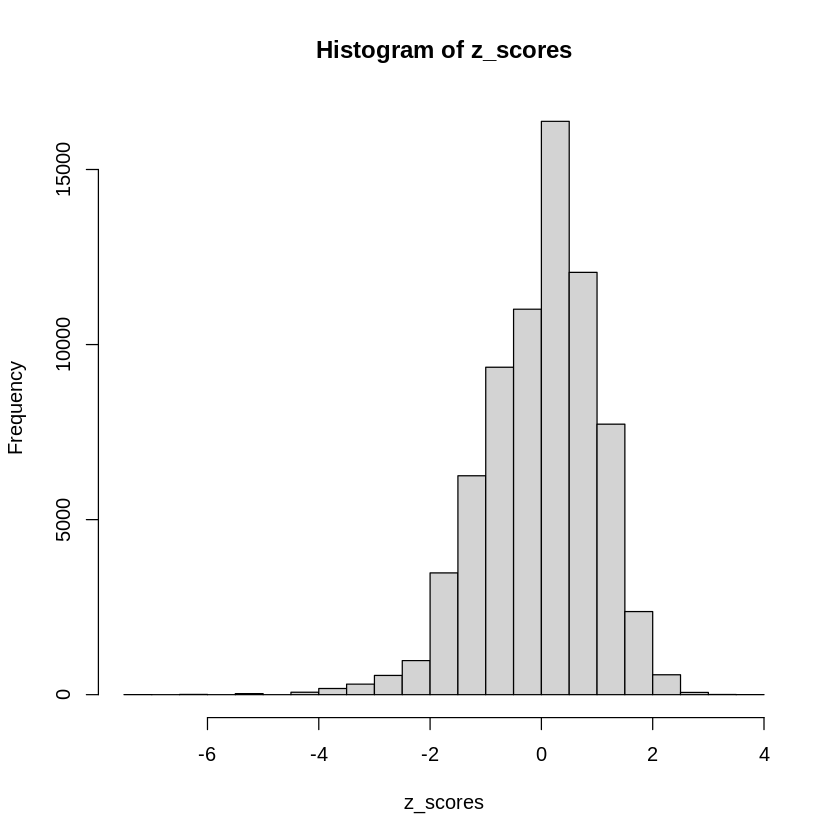

In [338]:
hist(z_scores)

In [339]:
bottom_cells_z = rownames(y[y$z_scores < -2,])
top_cells_z = rownames(y[y$z_scores > 2,])

In [340]:
length(top_cells_z)
length(bottom_cells_z)

[1] 1023

[1] 0

In [341]:
### get donors

In [342]:
head(sce_22@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,⋯,age,sex,predicted.celltype,predicted.celltype.l3,predicted.celltype.l4,predicted.celltype.l5,predicted.celltype.l6,G2M.Score,S.Score,Phase
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,⋯,<int>,<int>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
AAACCTGCAACGATCT-1,onek1k,39,18,pool_1,686_687,3.717182,b1,34,18,TCL1A+ FCER2+ B cell,⋯,69,1,TCL1A+ FCER2+ B cell,B naive,B cell,B cell,Lymphoid,-0.026746015,-0.0002682458,G1
AAACGGGCAGTTCATG-1,onek1k,46,26,pool_1,682_683,4.010349,b1,45,26,TCL1A+ FCER2+ B cell,⋯,73,1,TCL1A+ FCER2+ B cell,B naive,B cell,B cell,Lymphoid,-0.022353539,0.0187772069,S
AAACGGGGTCCCTACT-1,onek1k,63,28,pool_1,692_693,2.704292,b1,59,28,TCL1A+ FCER2+ B cell,⋯,62,2,TCL1A+ FCER2+ B cell,B naive,B cell,B cell,Lymphoid,0.013419855,-0.0049571022,G2M
AAACGGGGTTGCGCAC-1,onek1k,36,17,pool_1,683_684,3.783045,b1,41,17,TCL1A+ FCER2+ B cell,⋯,78,1,TCL1A+ FCER2+ B cell,B naive,B cell,B cell,Lymphoid,0.006211548,0.0100323934,S
AAAGATGGTTATGCGT-1,onek1k,22,12,pool_1,686_687,4.415423,b1,31,12,TCL1A+ FCER2+ B cell,⋯,69,1,TCL1A+ FCER2+ B cell,B naive,B cell,B cell,Lymphoid,-0.011067374,0.0040236872,S
AAAGATGTCATGCATG-1,onek1k,138,44,pool_1,687_688,3.022627,b1,91,41,TCL1A+ FCER2+ B cell,⋯,63,2,TCL1A+ FCER2+ B cell,B naive,B cell,B cell,Lymphoid,-0.009985215,-0.0187964884,G1


In [343]:
individuals = unique(sce_22@meta.data$individual)
n = length(individuals)
n

[1] 980

In [344]:
df0 = data.frame(individual = individuals)
head(df0,2)

,individual
,<chr>
1,686_687
2,682_683


In [345]:
for (individual in individuals){
    df_curr = sce_22@meta.data[sce_22@meta.data$individual == individual,]
    n_tot = nrow(df_curr)
    n_top_z = nrow(df_curr[rownames(df_curr) %in% top_cells_z,])
    n_top = nrow(df_curr[rownames(df_curr) %in% top_cells,])
    n_bottom_z = nrow(df_curr[rownames(df_curr) %in% bottom_cells_z,])
    n_bottom = nrow(df_curr[rownames(df_curr) %in% bottom_cells,])
    df0[df0$individual == individual, "tot_cells"] = n_tot
    df0[df0$individual == individual, "top_outliers_pct"] = n_top / n_tot
    df0[df0$individual == individual, "top_z_outliers_pct"] = n_top_z / n_tot
    df0[df0$individual == individual, "bottom_outliers_pct"] = n_bottom / n_tot
    df0[df0$individual == individual, "bottom_z_outliers_pct"] = n_bottom_z / n_tot
}

In [346]:
head(df0)

,individual,tot_cells,top_outliers_pct,top_z_outliers_pct,bottom_outliers_pct,bottom_z_outliers_pct
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,686_687,125,0.00000000,0.00000000,0,0
2,682_683,52,0.00000000,0.00000000,0,0
3,692_693,48,0.00000000,0.00000000,0,0
4,683_684,142,0.01408451,0.01408451,0,0
5,687_688,78,0.00000000,0.00000000,0,0
6,690_691,61,0.00000000,0.00000000,0,0


In [347]:
bottom_individuals = df0[df0$bottom_outliers_pct>0.1,"individual"]
bottom_z_individuals = df0[df0$bottom_z_outliers_pct>0.1,"individual"]
length(bottom_individuals)
length(bottom_individuals[bottom_individuals %in% bottom_z_individuals])

[1] 0

[1] 0

In [348]:
top_individuals = df0[df0$top_outliers_pct>0.1,"individual"]
top_z_individuals = df0[df0$top_z_outliers_pct>0.1,"individual"]
length(top_z_individuals)
length(top_individuals)
length(top_individuals[top_individuals %in% top_z_individuals])

[1] 6

[1] 6

[1] 6

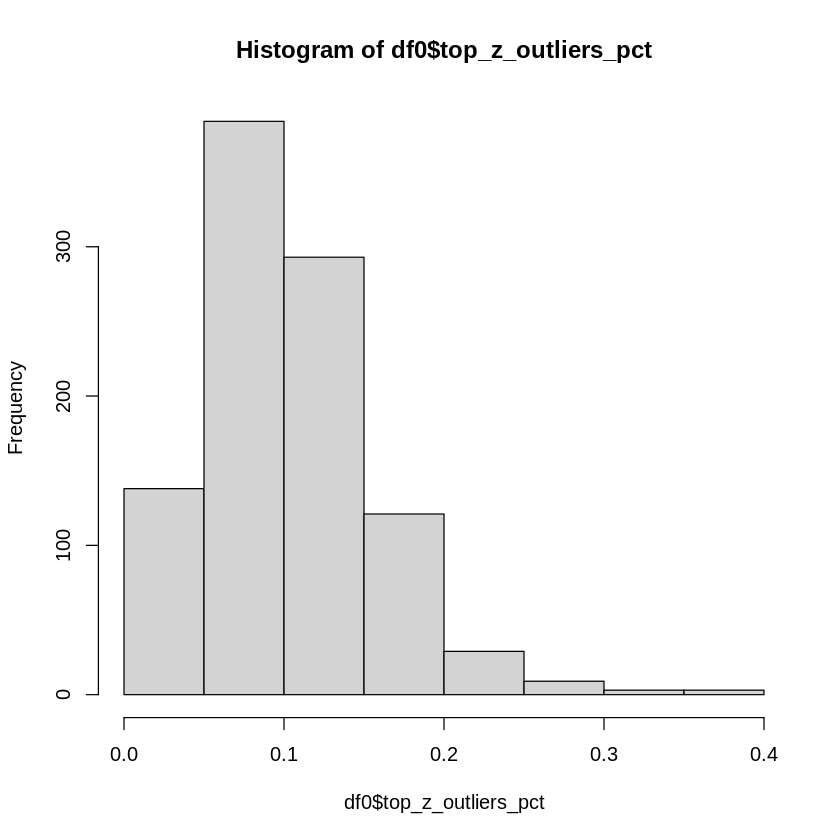

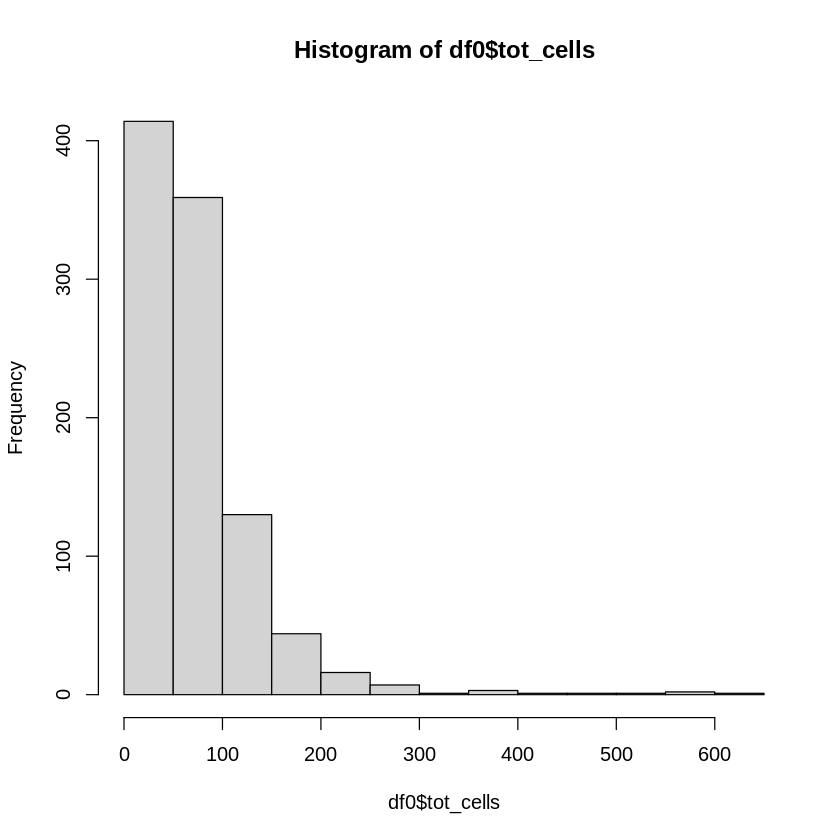

In [316]:
hist(df0$top_z_outliers_pct)
hist(df0$tot_cells)

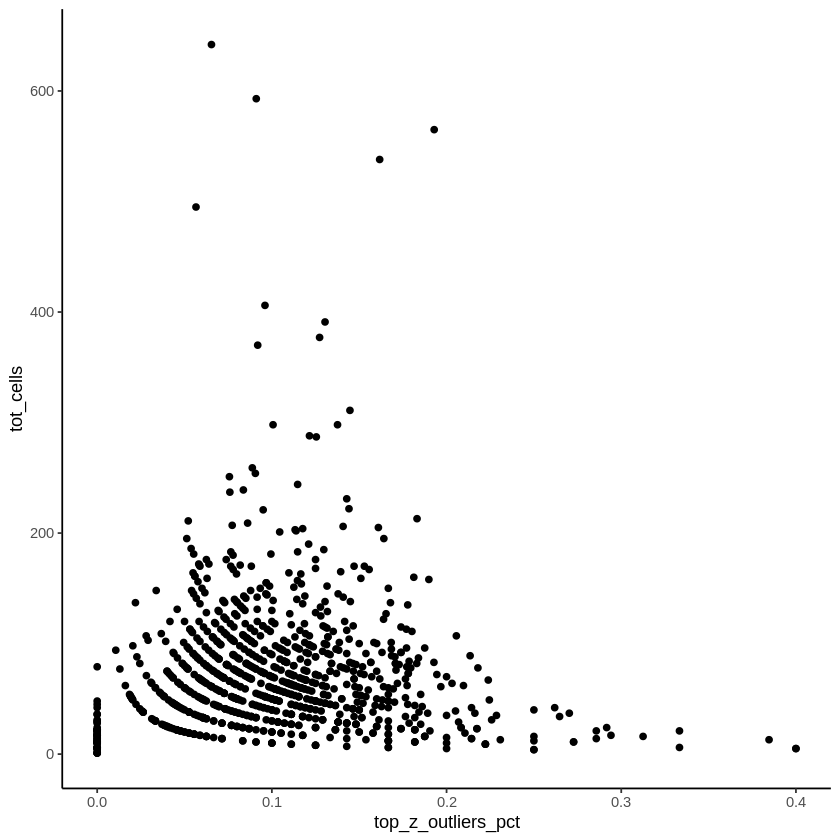

In [317]:
ggplot(df0, aes(x=top_z_outliers_pct, y=tot_cells)) + geom_point() + theme_classic()

In [318]:
# nrow(df0[df0$outliers_pct>0.1,])
# df0[df0$outliers_pct>0.1,]

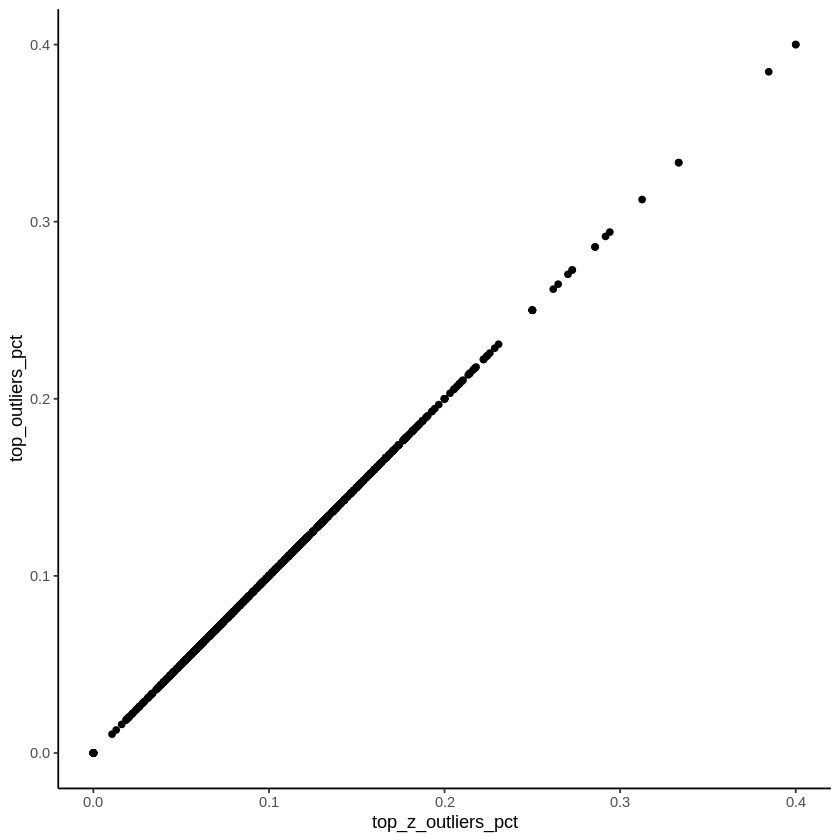

In [319]:
ggplot(df0, aes(x=top_z_outliers_pct, y=top_outliers_pct)) + geom_point() + theme_classic()

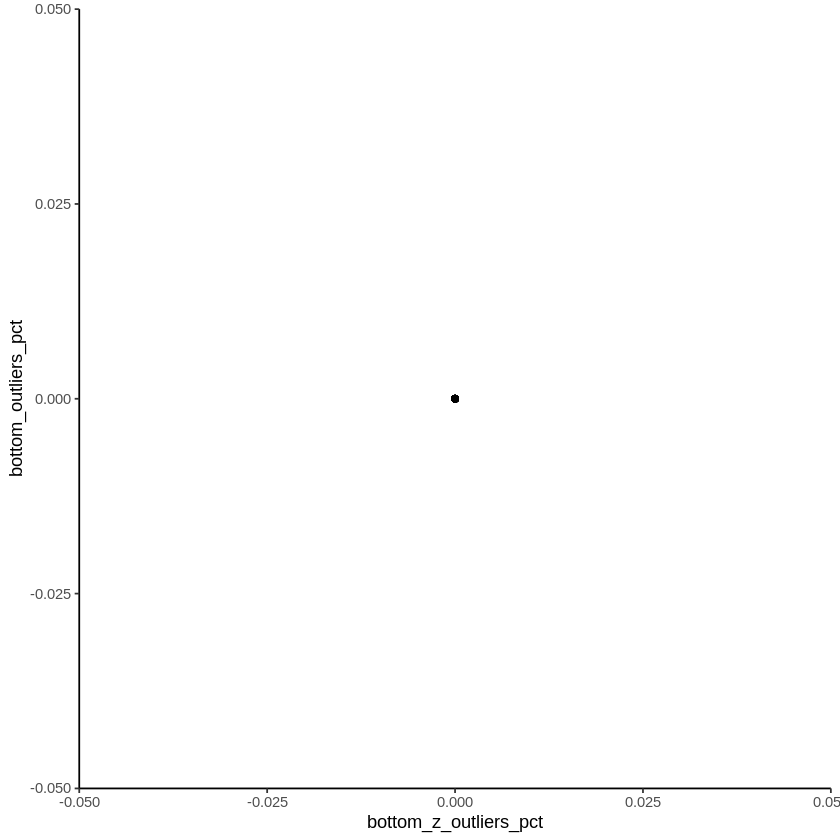

In [320]:
ggplot(df0, aes(x=bottom_z_outliers_pct, y=bottom_outliers_pct)) + geom_point() + theme_classic()

In [157]:
selected_cells = rownames(sce_22@meta.data[sce_22@meta.data$individual %in% df0[df0$outliers_pct>0.1,"individual"],])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 19 rows containing missing values (geom_bar).”


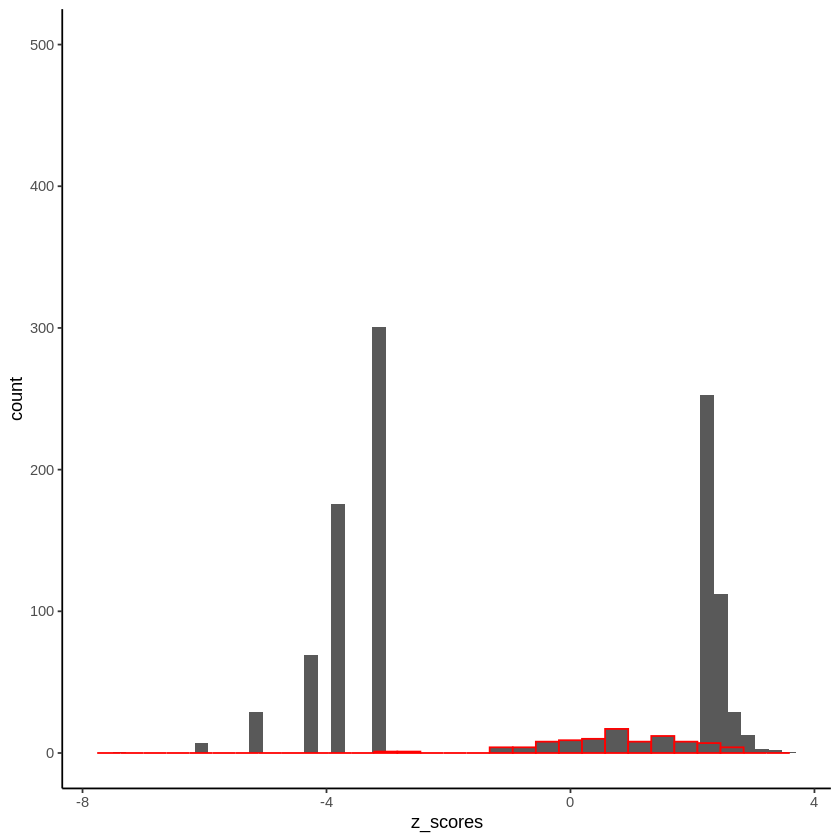

In [164]:
p = ggplot(y, aes(x=z_scores)) + geom_histogram(bins=50) + theme_classic() 
p + geom_histogram(data = y[rownames(y) %in% selected_cells,], col="red", aes(x=z_scores)) + ylim(0,500)

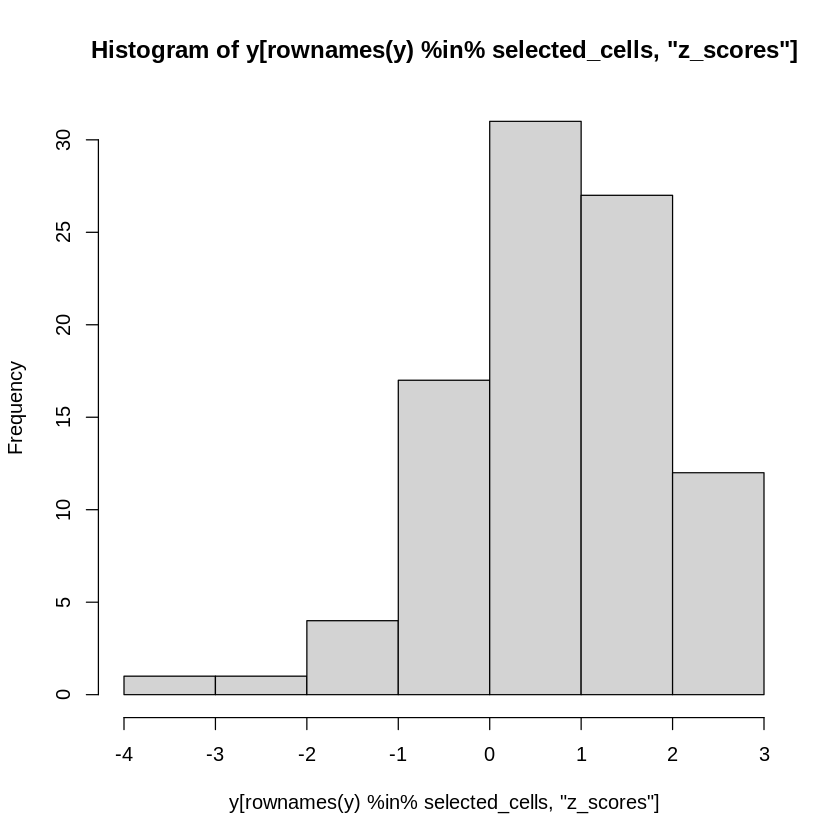

In [162]:
hist(y[rownames(y) %in% selected_cells,"z_scores"])